# Regression Machine Learning to Predict Concrete Compressive Strength

We will be evaluating the Concrete Compressive Strength data set obtained from: 
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Regression models will be exclusively used on this data set to predict concrete compressive strength as the target feature from 8 other features present in the data set. 

In [188]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.feature_selection import mutual_info_regression
plt.rcParams["figure.figsize"] = (20,10)


In [189]:
from __future__ import print_function
import os
#Set data sets path here
data_path = [r'C:\Users\nbenn\OneDrive - Knights - University of Central Florida\SUM 22\CNT 4153 C']


In [190]:
# Data set has been converted from .xls file to .csv file using excel prior to uploading
filepath = os.sep.join(data_path + ['Concrete_Data.csv'])
data = pd.read_csv(filepath, sep = ',')


# Sample of what the data looks like before any cleaning or processing
print(data.shape)
data.head()

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [191]:
data.dtypes.value_counts()

float64    8
int64      1
dtype: int64

In [192]:
#check for null data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [193]:
# Check to see if any data cell is null
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [194]:
# Select the object (string) columns and configure the names to our liking
import re
data.columns = data.columns.str.replace( "\(.*\)" ,"", regex=True)
data.columns = data.columns.str.replace( " " ,"", regex=True)
categorical_columns = data.columns
categorical_columns

Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
       'CoarseAggregate', 'FineAggregate', 'Age',
       'Concretecompressivestrength'],
      dtype='object')

# Descriptive Statistical Details of the Dataset

In [195]:
# Descriptive Statistics for the entire dataset
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Concretecompressivestrength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [196]:
# Descriptive Statistics just for the target feature
data['Concretecompressivestrength'].describe()

count    1030.000000
mean       35.817961
std        16.705742
min         2.330000
25%        23.710000
50%        34.445000
75%        46.135000
max        82.600000
Name: Concretecompressivestrength, dtype: float64

# Data Visualization

## Correlation Matrix

A correlation matrix will tell us the statistical measurement of relationship strength between variables. This measurement is important to know in the case of changing parameters when predicting can inform the regressive model that a change in one variable that's strongly correlated with another variable will lead to a similar change in that variable as well. 
Darker colors will represent higher values and lighter colors will represent lower values

## Pairplot

Pairplots are used to plot pairwise relationships in the form of scatter plots where there is more data to show correlations between two features via their pair values, where one feature is represented on the x-axis and the other is on the y-axis. Pairplots allow us to see the behavior of two variables more clearly than a correlation matrix. 
Increasing trends show positive correlations and decreasing trends show negative correlations. 
If no trend is detected then there is no correlation, which can make prediction a little more difficult

## Distribution Plot
Distribution plots show how the distribution of the target variable across the dataset. If the distribution is too flat or heavily skewed, prediction will also be difficult. 
A more uniform distribution shows that the data is diverse enough to distinguish between features for prediction

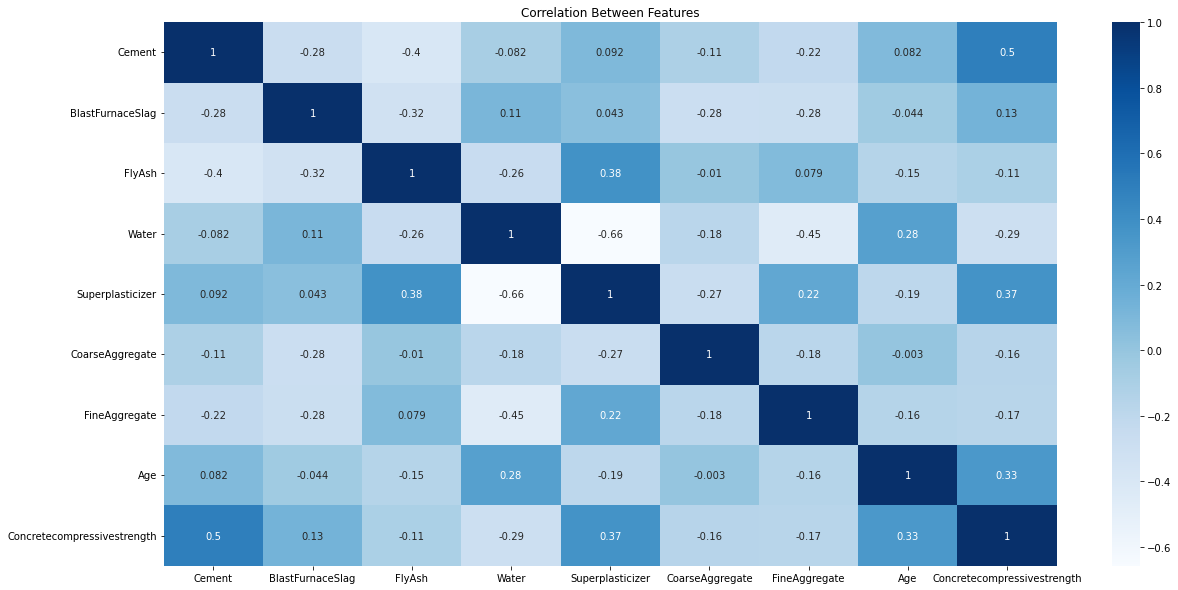

Text(0.5, 1.0, 'Distribution of Concrete Strength')

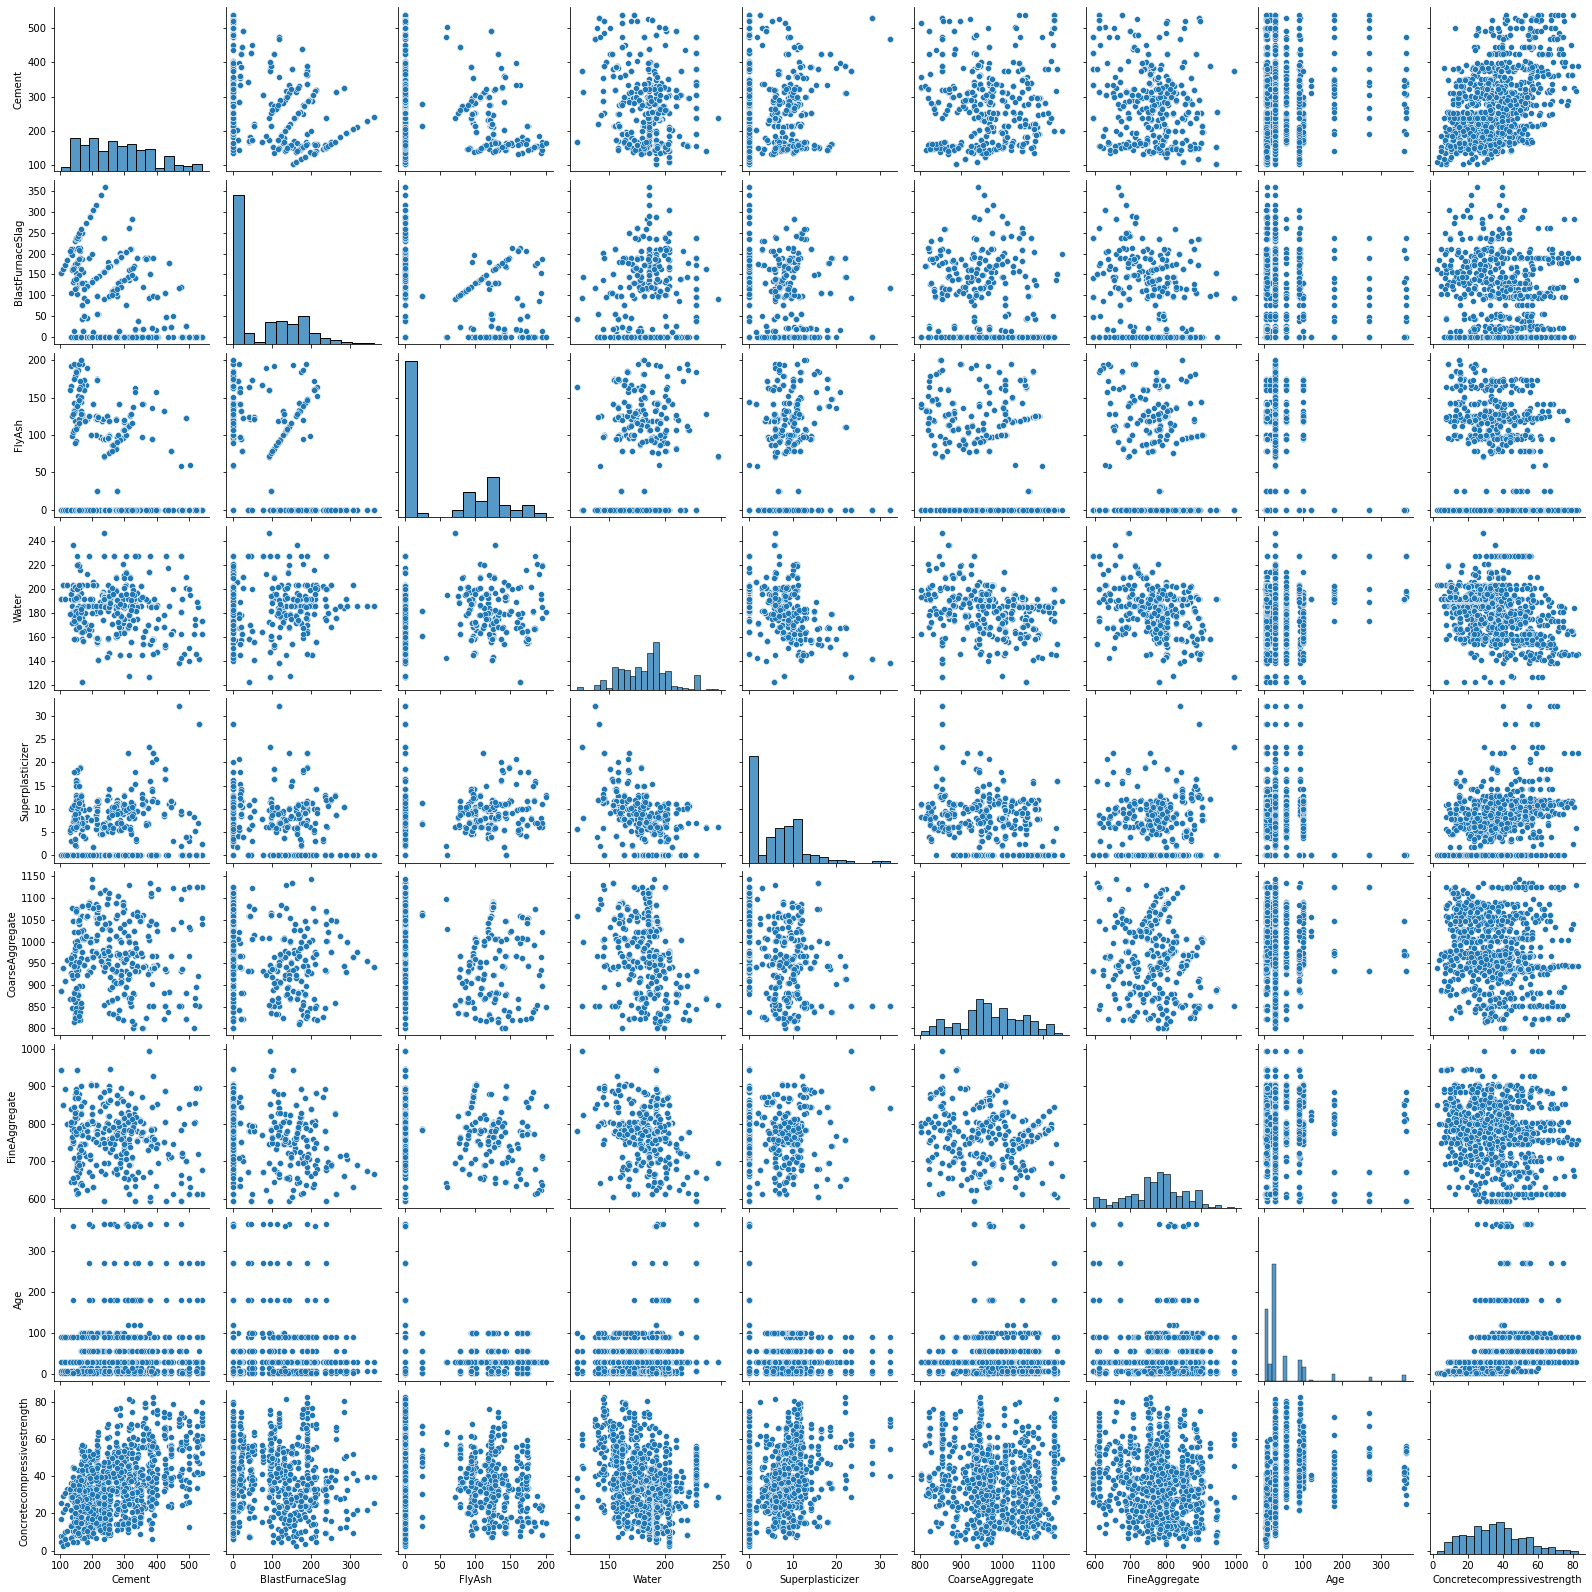

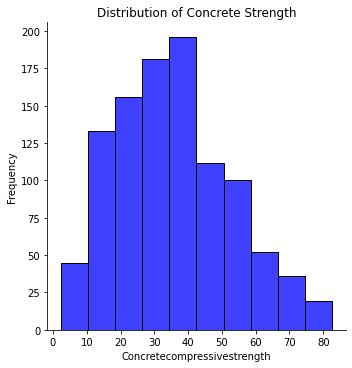

In [197]:
# Correlation Matrix
sns.heatmap(data.corr(), cmap = 'Blues', annot= True)
plt.title("Correlation Between Features")
plt.show()

# Pairplot
sns.pairplot(data)

# Distribution Plot
sns.displot(data['Concretecompressivestrength'], bins=10, color='b')
plt.ylabel("Frequency")
plt.title('Distribution of Concrete Strength')

# Correlation of features with Concrete Compressive Strength greater than the mean MPa

We want to see what correlations exist with the concrete features that generate a concrete compressive strength greater than the average in the data set. 

As we can see below, the concrete compressive strength is positively correlated greatly with the cement, age, and superplasticizer and greatly negatively correlated with water, fine aggregate and coarse aggregate.


## Correlations Plot 

Correlations plot will visually represent the data that had been calculated numerically in the previous cell. 
Visually we can see what the strength and type of correlation (negative, positive, none) a feature has with the target feature (concrete compressive strength). 
We hope to use positively correlated data as a good predictor during the machine learning process. 

The first numerical calcuations will be to see correlations between datasets under the condition that they are greater than the mean of the concrete compressive strength values. Can we see better correlations with higher strengths in the correlation plot? 

The second numerical calculations will see correlations that are greater than the min, we only lose one data set, as we can see in the correlation plot, these correlations lose their strength when larger data is included in the correlations plot. 


In [198]:
y = (data['Concretecompressivestrength'] > data['Concretecompressivestrength'].mean()).astype(int)
fields = list(data.columns[:-1])
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

Water              -0.194657
FineAggregate      -0.173809
CoarseAggregate    -0.106592
FlyAsh             -0.078216
BlastFurnaceSlag    0.069940
Superplasticizer    0.262947
Age                 0.354345
Cement              0.399703
dtype: float64

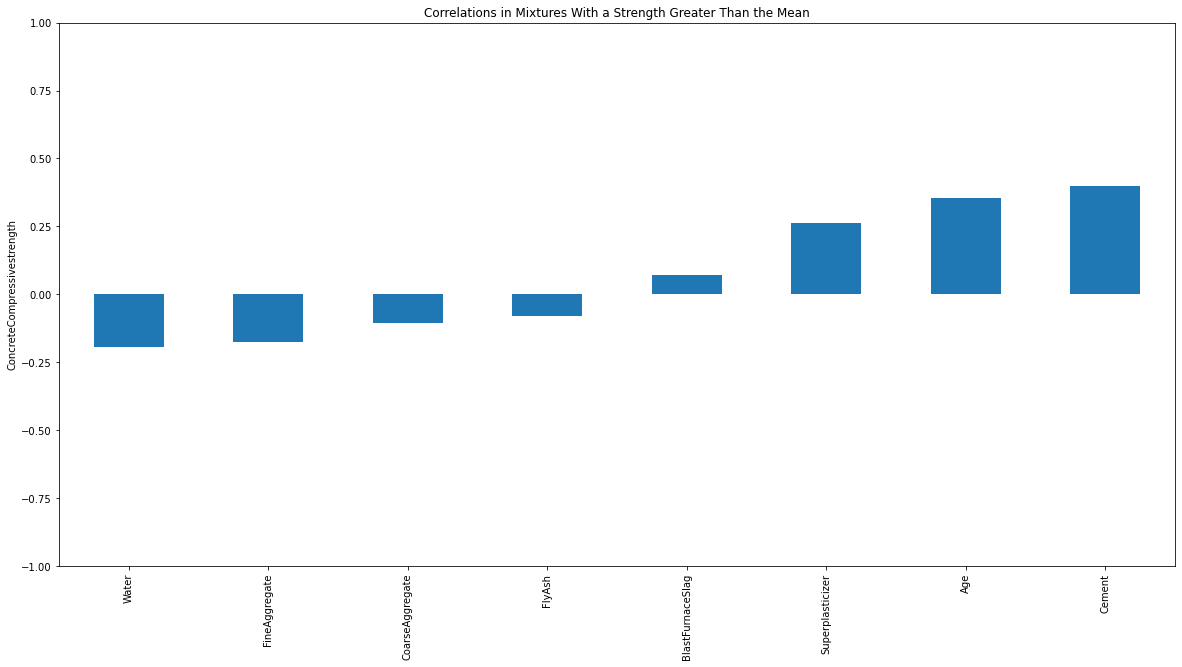

In [199]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel = 'ConcreteCompressivestrength', title = 'Correlations in Mixtures With a Strength Greater Than the Mean');

In [200]:
data.corr()['Concretecompressivestrength'].sort_values(ascending = False)

Concretecompressivestrength    1.000000
Cement                         0.497832
Superplasticizer               0.366079
Age                            0.328873
BlastFurnaceSlag               0.134829
FlyAsh                        -0.105755
CoarseAggregate               -0.164935
FineAggregate                 -0.167241
Water                         -0.289633
Name: Concretecompressivestrength, dtype: float64

In [201]:
y = (data['Concretecompressivestrength'] > data['Concretecompressivestrength'].min()).astype(int)
fields = list(data.columns[:-1])
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)

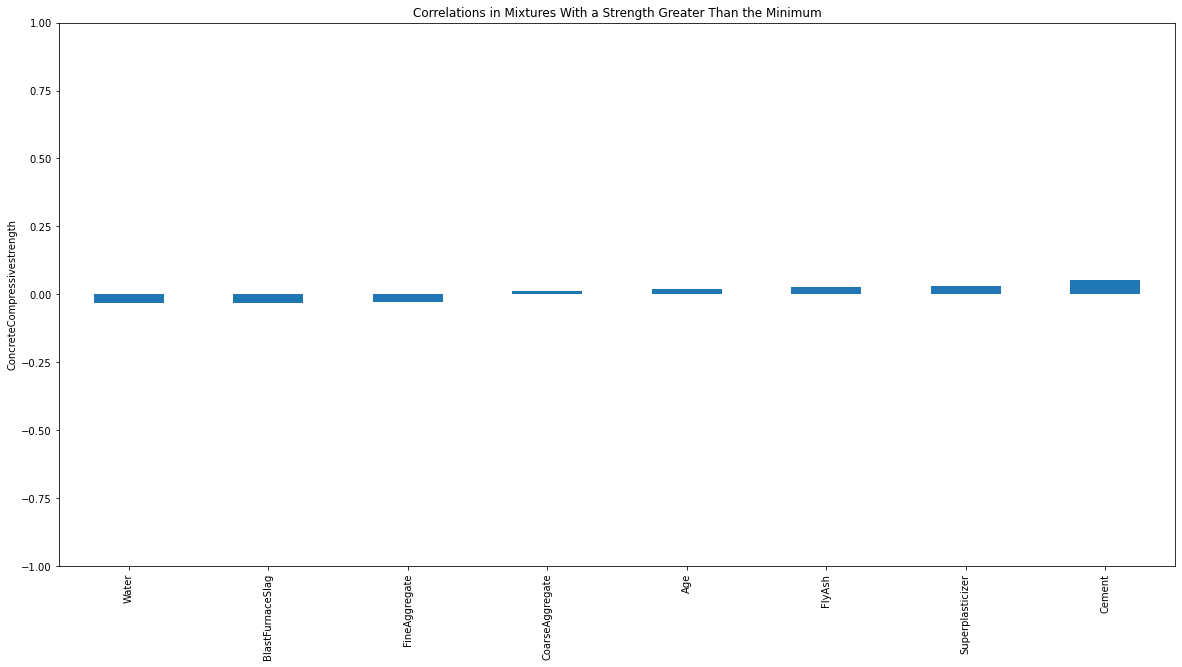

In [202]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel = 'ConcreteCompressivestrength', title = 'Correlations in Mixtures With a Strength Greater Than the Minimum');

# Train Test Split

In [203]:
y_col = 'Concretecompressivestrength'

feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

train_X, test_X, train_y, test_y = train_test_split(X_data, y_data,
                                                    test_size=0.3, random_state=42)

In [204]:
X_data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


# Feature Scaling 

In [205]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
fit = sc.fit(train_X)
train_X_sc = fit.transform(train_X)
test_X_sc = fit.transform(test_X)

# Linear Regression

## Oridnary Least Squares Linear Regression
Fits a linear model with coefficients to minimuze the residual sum of squares between the observed targets in the dataset, target is predicted by the linear approximation. 

sklearn import linear_model library: 

https://github.com/scikit-learn/scikit-learn/blob/baf0ea25d/sklearn/linear_model/_base.py#L529

or

https://github.com/scikit-learn/scikit-learn/blob/ef5cb84a/sklearn/linear_model/base.py#L405

To see the baseline for the library

This is the method used to implement Linear Regression on the model.



In [206]:
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(train_X_sc, train_y)
predict_y = lr_model.predict(test_X_sc)


score = lr_model.score(test_X_sc, test_y)

print('predcted score % is : {}'.format(round(score*100, 3)) )

print('...............................................')


print('Mean Absolute Error:', mean_absolute_error(test_y, predict_y))  

print('R2 Score:', r2_score(test_y, predict_y))

print('Mean Squared Error:',mean_squared_error(test_y, predict_y))

rms = np.sqrt(mean_squared_error(test_y, predict_y)) 
print('Root Mean Squared Error: {}'.format(rms))


predcted score % is : 59.438
...............................................
Mean Absolute Error: 8.298580847947502
R2 Score: 0.5943782479239206
Mean Squared Error: 109.75080797014401
Root Mean Squared Error: 10.47620198211852


# Linear Regression Predicted vs. Actual Values Scatter Plot

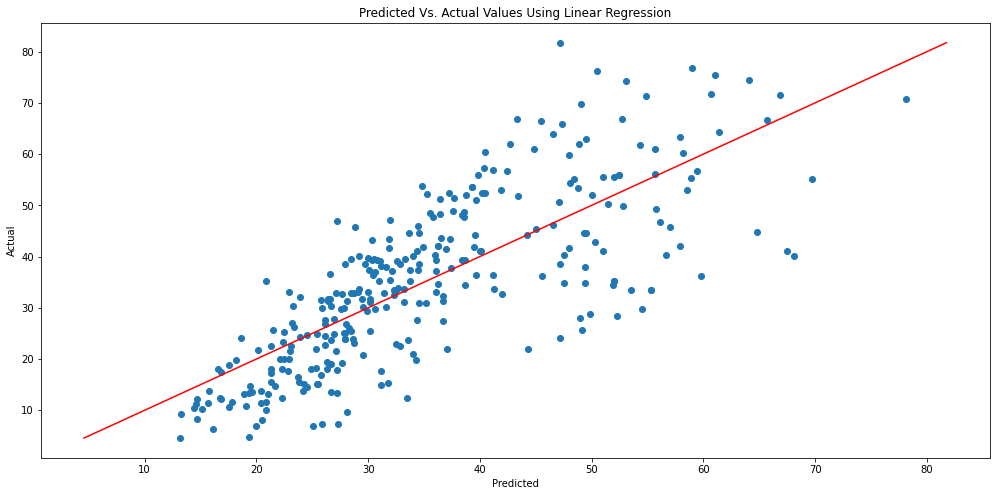

In [207]:
plt.figure(figsize=[17,8])
plt.scatter(predict_y,test_y)

plt.title('Predicted Vs. Actual Values Using Linear Regression')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Support Vector Regression

## Find the best C to use for the data

In [208]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

test_mae_list = []
perc_within_eps_list = []

eps = 5
c_space = np.linspace(0.01, 10)

for c in c_space:
    varied_svr = SVR(epsilon=eps, C=c, max_iter=10000)
    
    varied_svr.fit(train_X, train_y)
    
    test_mae = mean_absolute_error(test_y, varied_svr.predict(test_X))
    test_mae_list.append(test_mae)
    
    perc_within_eps = 100*np.sum(abs(test_y-varied_svr.predict(test_X)) <= eps) / len(test_y)
    perc_within_eps_list.append(perc_within_eps)

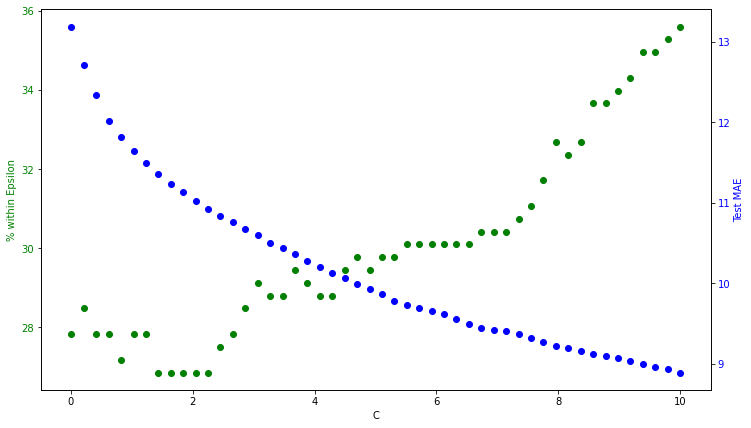

In [209]:
fig, ax1 = plt.subplots(figsize=(12,7))

color='green'
ax1.set_xlabel('C')
ax1.set_ylabel('% within Epsilon', color=color)
ax1.scatter(c_space, perc_within_eps_list, color=color)
ax1.tick_params(axis='y', labelcolor=color)

color='blue'
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Test MAE', color=color)  # we already handled the x-label with ax1
ax2.scatter(c_space, test_mae_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)


plt.show()

In [210]:
m = max(perc_within_eps_list)
inds = [i for i, j in enumerate(perc_within_eps_list) if j == m]
C = c_space[inds[0]]

print("best C =", C)

best C = 10.0


## Kernel = Linear

In [211]:
svr_model_lr = SVR(C=10, kernel = 'linear')
svr_model_lr.fit(train_X_sc, train_y)
predict_y_svr = svr_model_lr.predict(test_X_sc)


score = svr_model_lr.score(test_X_sc, test_y)
print('predcted score % is : {}'.format(round(score*100, 3)) )
print('...............................................')
print('Mean Absolute Error:', mean_absolute_error(test_y, predict_y_svr))  
print('Mean Squared Error:',mean_squared_error(test_y, predict_y_svr))

rms = np.sqrt(mean_squared_error(test_y, predict_y_svr)) 
print('Root Mean Squared Error: {}'.format(rms))

predcted score % is : 53.163
...............................................
Mean Absolute Error: 8.294708874488704
Mean Squared Error: 126.72862817892421
Root Mean Squared Error: 11.257381053287848


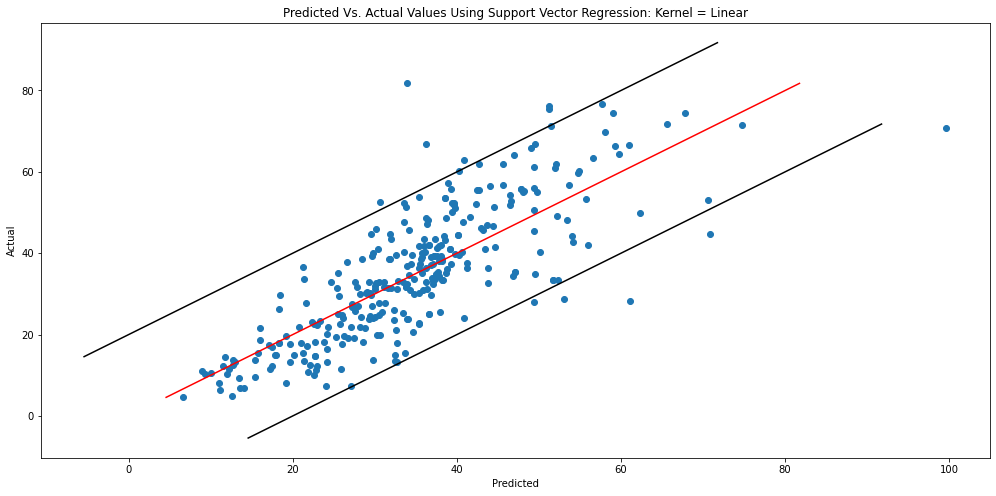

In [224]:
c = 10
plt.figure(figsize=[17,8])
plt.scatter(predict_y_svr, test_y)
plt.title('Predicted Vs. Actual Values Using Support Vector Regression: Kernel = Linear')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red')
plt.plot([test_y.min()+c, test_y.max()+c], [test_y.min()-c, test_y.max()-c], color='black')
plt.plot([test_y.min()-c, test_y.max()-c], [test_y.min()+c, test_y.max()+c], color='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Kernel = RBF

In [213]:
from sklearn.svm import SVR

svr_model_rbf = SVR(C=10, kernel = 'rbf')
svr_model_rbf.fit(train_X_sc, train_y)
predict_y_svr = svr_model_rbf.predict(test_X_sc)


score = svr_model_rbf.score(test_X_sc, test_y)
print('predcted score % is : {}'.format(round(score*100, 3)) )
print('...............................................')
print('Mean Absolute Error:', mean_absolute_error(test_y, predict_y_svr))  
print('Mean Squared Error:',mean_squared_error(test_y, predict_y_svr))

rms = np.sqrt(mean_squared_error(test_y, predict_y_svr)) 
print('Root Mean Squared Error: {}'.format(rms))

predcted score % is : 78.502
...............................................
Mean Absolute Error: 5.581067024193468
Mean Squared Error: 58.168314840918114
Root Mean Squared Error: 7.62681551113688


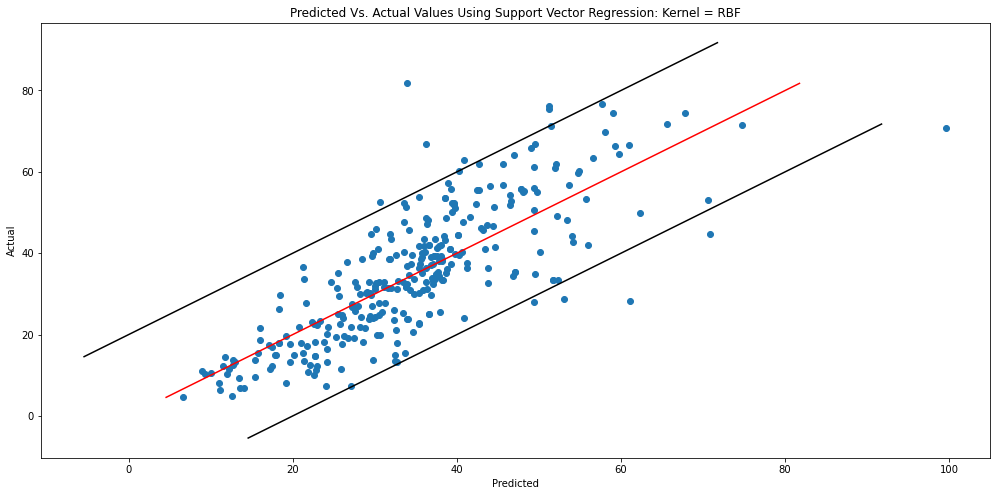

In [225]:
c = 10
plt.figure(figsize=[17,8])
plt.scatter(predict_y_svr, test_y)
plt.title('Predicted Vs. Actual Values Using Support Vector Regression: Kernel = RBF')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red')
plt.plot([test_y.min()+c, test_y.max()+c], [test_y.min()-c, test_y.max()-c], color='black')
plt.plot([test_y.min()-c, test_y.max()-c], [test_y.min()+c, test_y.max()+c], color='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Kernel = Poly

In [215]:
from sklearn.svm import SVR

svr_model_poly = SVR(C=10, kernel = 'poly')
svr_model_poly.fit(train_X_sc, train_y)
predict_y_svr = svr_model_poly.predict(test_X_sc)


score = svr_model_poly.score(test_X_sc, test_y)
print('predcted score % is : {}'.format(round(score*100, 3)) )
print('...............................................')
print('Mean Absolute Error:', mean_absolute_error(test_y, predict_y_svr))  
print('Mean Squared Error:',mean_squared_error(test_y, predict_y_svr))

rms = np.sqrt(mean_squared_error(test_y, predict_y_svr)) 
print('Root Mean Squared Error: {}'.format(rms))

predcted score % is : 62.928
...............................................
Mean Absolute Error: 7.508209788471986
Mean Squared Error: 100.30821457734565
Root Mean Squared Error: 10.01539887260341


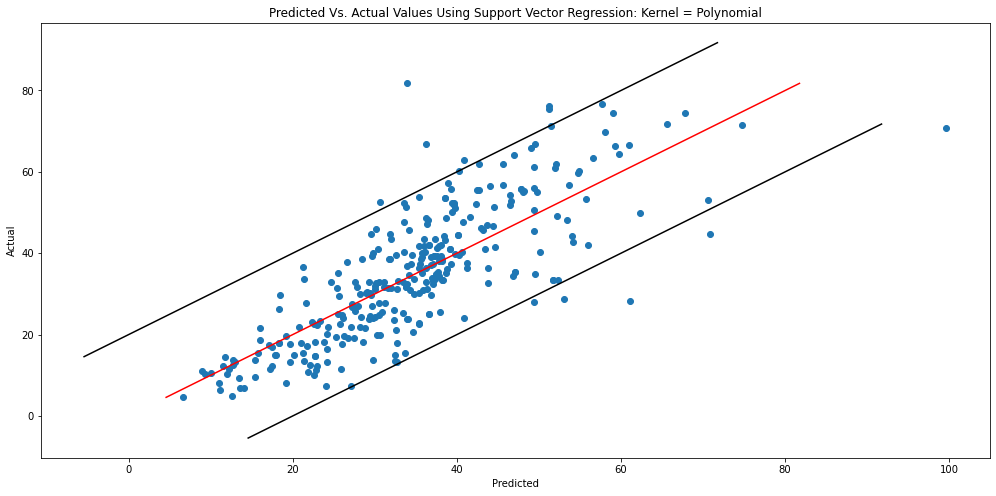

In [227]:
c = 10
plt.figure(figsize=[17,8])
plt.scatter(predict_y_svr, test_y)
plt.title('Predicted Vs. Actual Values Using Support Vector Regression: Kernel = Polynomial')
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], color='red')
plt.plot([test_y.min()+c, test_y.max()+c], [test_y.min()-c, test_y.max()-c], color='black')
plt.plot([test_y.min()-c, test_y.max()-c], [test_y.min()+c, test_y.max()+c], color='black')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Regression

In [218]:
from sklearn.ensemble import RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators = 100)
rfr_model.fit(train_X_sc, train_y)
predict_y_rfr = rfr_model.predict(test_X_sc)

score = rfr_model.score(test_X_sc, test_y)
print('Predcted Score % is : {}'.format(round(score*100, 3)) )
print('...............................................')
print('Mean Absolute Error:', mean_absolute_error(test_y, predict_y_rfr))  
print('Mean Squared Error:',mean_squared_error(test_y, predict_y_rfr))

rms = np.sqrt(mean_squared_error(test_y, predict_y_rfr)) 
print('Root Mean Squared Error: {}'.format(rms))

Predcted Score % is : 88.362
...............................................
Mean Absolute Error: 3.8620147303128376
Mean Squared Error: 31.490251543404987
Root Mean Squared Error: 5.611617551419999


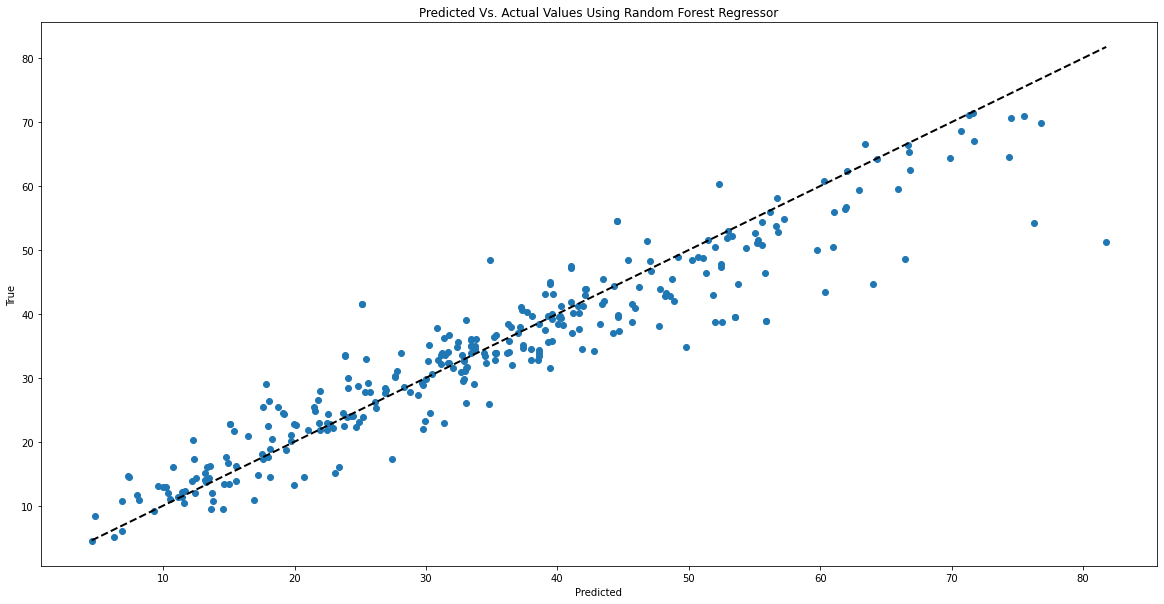

In [228]:
plt.scatter(test_y, predict_y_rfr) 
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'k--', lw=2) 
plt.xlabel("Predicted") 
plt.ylabel("True") 
plt.title("Predicted Vs. Actual Values Using Random Forest Regressor") 
plt.show()

# Mean Absolute Error 

In [232]:
print('\nMean Absolute Error \n\n')

models = [lr_model, svr_model_lr, svr_model_rbf, svr_model_poly, rfr_model]
model_names = ['Linear Regression Model', 'SVR Linear Model', 'SVR RBF Model', 'SVR Polynomial Model', 'Random Forest Regression Model']
for model,model_name in zip(models,model_names):
    mae = mean_absolute_error(model.predict(test_X_sc),test_y)
    print(f"{model_name}  MEA = {round(mae, 3)}\n" )
    


Mean Absolute Error 


Linear Regression Model  MEA = 8.299

SVR Linear Model  MEA = 8.295

SVR RBF Model  MEA = 5.581

SVR Polynomial Model  MEA = 7.508

Random Forest Regression Model  MEA = 3.862



# Accuracy Score

In [233]:
print('\nAccuracy Score \n\n')

for model,model_name in zip(models,model_names):
    accuracy = model.score(test_X_sc,test_y)
    print(f"{model_name} Accuracy Score = {round(accuracy*100, 3)} %\n")




Accuracy Score 


Linear Regression Model Accuracy Score = 59.438 %

SVR Linear Model Accuracy Score = 53.163 %

SVR RBF Model Accuracy Score = 78.502 %

SVR Polynomial Model Accuracy Score = 62.928 %

Random Forest Regression Model Accuracy Score = 88.362 %



# Prediction vs. Actual Results

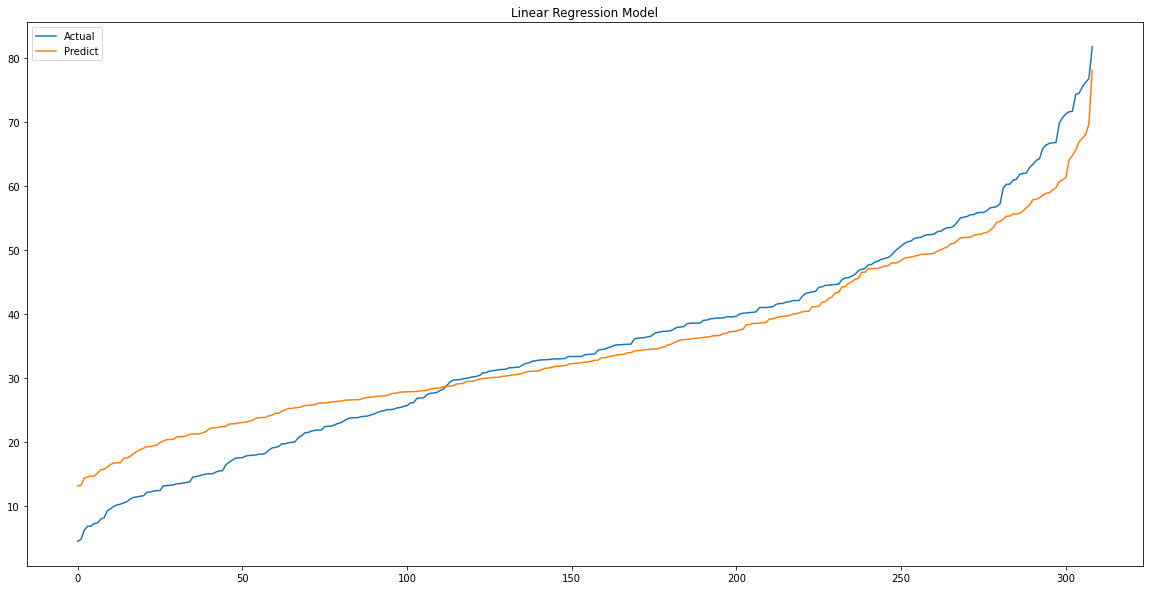

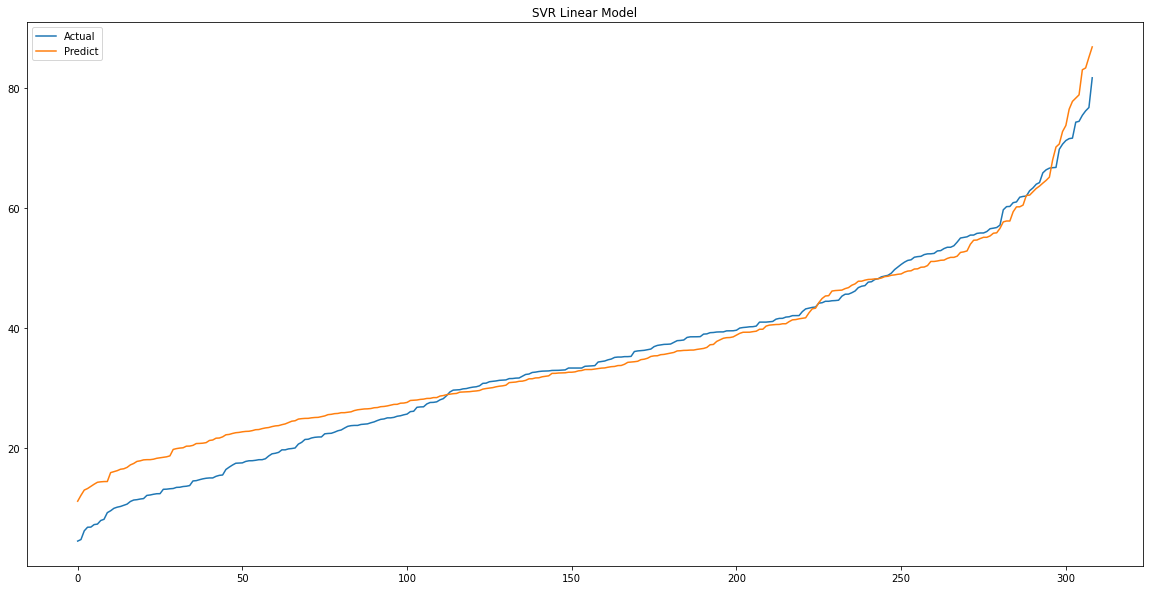

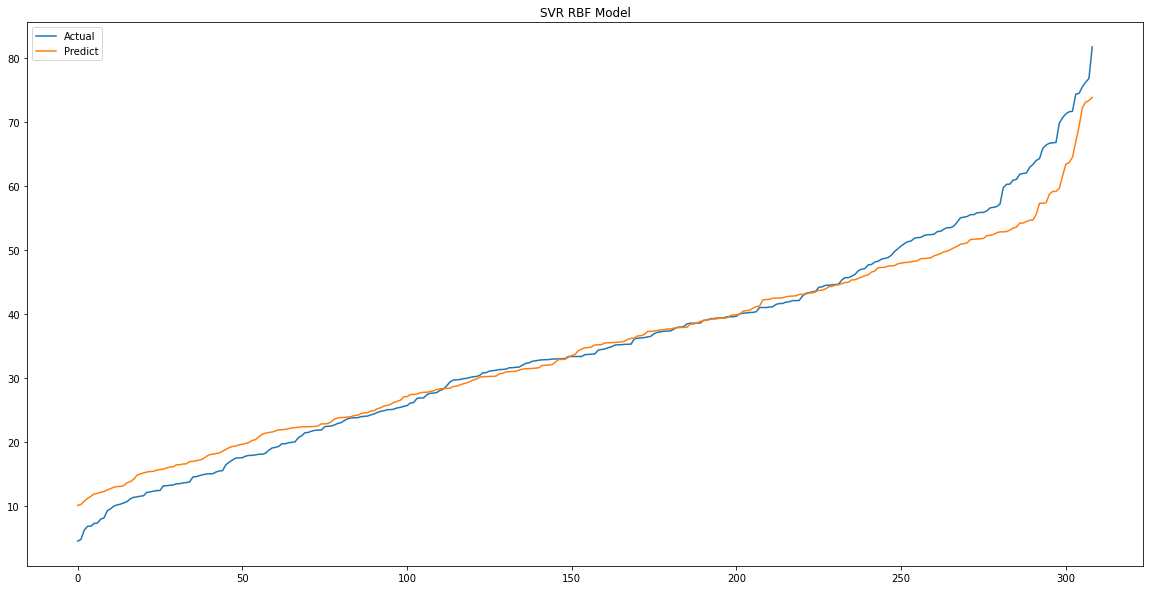

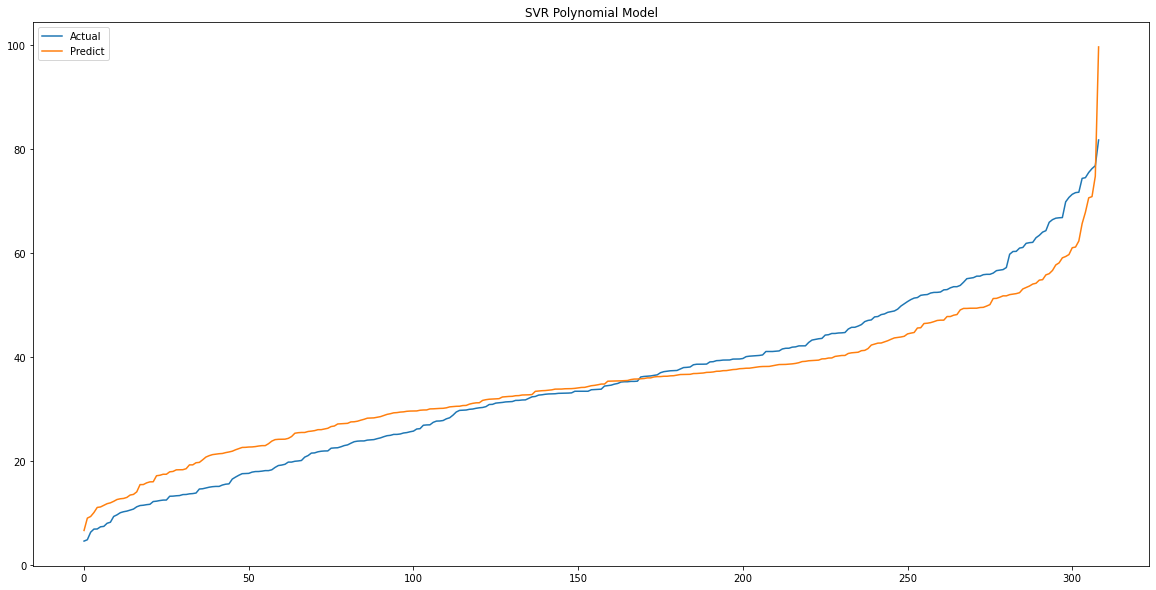

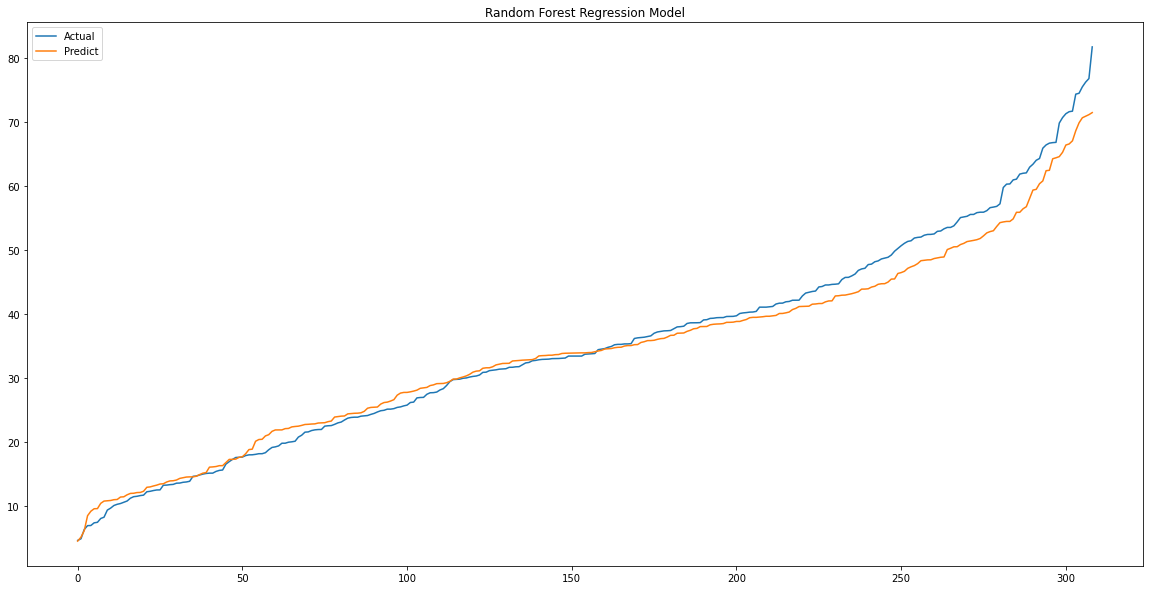

In [235]:
real = np.sort(test_y)
for model,model_name in zip(models,model_names):
    plt.plot(real, label = 'Actual')
    plt.plot(np.sort(model.predict(test_X_sc)), label = 'Predict')
    plt.legend(loc = 'upper left')
    plt.title(model_name)
    plt.show()
